# Prep

In [705]:
import pandas as pd
import numpy as np

df = pd.read_csv('data/final.csv', sep=';', encoding='utf-8')

print(df.columns)

Index(['NUTS Region', 'CO', 'NO', 'NO2', 'O3', 'PM10', 'SO2',
       'Euro per inhabitant',
       'Euro per inhabitant in percentage of the EU27 (from 2020) average',
       'Million euro',
       'Million purchasing power standards (PPS, EU27 from 2020)',
       'Million units of national currency',
       'Purchasing power standard (PPS, EU27 from 2020), per inhabitant',
       'Purchasing power standard (PPS, EU27 from 2020), per inhabitant in percentage of the EU27 (from 2020) average',
       'Acute myocardial infarction including subsequent myocardial infarction',
       'All causes of death (A00-Y89) excluding S00-T98',
       'Asthma and status asthmaticus', 'Cerebrovascular diseases',
       'Chronic lower respiratory diseases', 'Diabetes mellitus',
       'Malignant melanoma of skin', 'Malignant neoplasm of breast',
       'Malignant neoplasm of colon, rectosigmoid junction, rectum, anus and anal canal',
       'Malignant neoplasm of trachea, bronchus and lung',
       'Ment

In [706]:
temp_df = pd.read_csv('data/avg_temp_cities.csv', sep=';', encoding='utf-8')
df = df.join(temp_df.set_index('NUTS Region'), on='NUTS Region')
df

,NUTS Region,CO,NO,NO2,O3,PM10,SO2,Euro per inhabitant,Euro per inhabitant in percentage of the EU27 (from 2020) average,Million euro,...,Chronic lower respiratory diseases,Diabetes mellitus,Malignant melanoma of skin,Malignant neoplasm of breast,"Malignant neoplasm of colon, rectosigmoid junction, rectum, anus and anal canal","Malignant neoplasm of trachea, bronchus and lung",Mental and behavioural disorders (F00-F99),Other ischaemic heart diseases,Other mental and behavioural disorders (remainder of F00-F99),Average Temperature
0,Algarve,NaN,2.013671,7.511391,58.004739,13.632518,NaN,18423.076923,67.846154,8051.043846,...,37.646667,58.679667,5.073667,27.421000,64.250667,68.664667,56.234667,35.688667,1.191667,17.432960
1,Alsace,0.271556,12.960635,23.000584,52.016278,17.262808,NaN,30069.230769,111.692308,56542.020769,...,35.446667,37.604000,4.356667,30.501000,46.993333,80.435667,77.749000,69.187000,10.229333,11.296420
2,Arnsberg,NaN,24.556277,31.221447,47.519913,18.648445,NaN,31484.615385,116.230769,113107.253077,...,83.845000,40.440333,5.779333,38.169667,57.066667,104.199000,104.830667,136.503000,2.553333,9.540239
3,Berlin,0.317673,13.385496,25.365312,45.693974,18.921961,1.207370,36053.846154,132.615385,126428.356154,...,83.976333,58.487333,5.002333,35.778000,47.267000,101.383000,75.958667,130.070333,3.258667,10.730387
4,Bratislavský kraj,0.317593,NaN,19.042966,54.652241,20.559125,2.517615,33046.153846,119.307692,21299.698462,...,27.215333,28.100667,9.637667,45.100333,84.083000,82.111667,25.297333,599.052000,0.630833,11.227977
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,Zeeland,NaN,NaN,NaN,NaN,NaN,NaN,32292.307692,118.769231,12327.859231,...,60.726000,31.535667,7.934000,31.108333,53.448667,93.764000,146.551000,41.145333,3.981667,11.430211
116,Zentralschweiz,NaN,NaN,NaN,NaN,NaN,NaN,70140.000000,247.400000,53856.440000,...,44.985000,31.198000,7.156000,29.836667,39.517333,60.373667,136.361333,156.710667,9.355333,6.448336
117,Zuid-Nederland,NaN,NaN,NaN,NaN,NaN,NaN,39053.846154,143.692308,141463.610000,...,90.514333,32.752667,7.016667,31.459333,59.177333,120.598333,168.114000,48.024000,4.238000,NaN
118,Åland,NaN,NaN,NaN,NaN,NaN,NaN,43769.230769,162.923077,1260.390769,...,64.914000,12.481333,8.999167,20.170667,59.922667,78.714000,60.396667,132.370333,7.400000,7.194748


In [707]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 28 columns):
 #   Column                                                                                                         Non-Null Count  Dtype  
---  ------                                                                                                         --------------  -----  
 0   NUTS Region                                                                                                    120 non-null    object 
 1   CO                                                                                                             48 non-null     float64
 2   NO                                                                                                             57 non-null     float64
 3   NO2                                                                                                            69 non-null     float64
 4   O3                                                

In [708]:
to_be_dropped = [
    "CO", "NO", "SO2", "PM10",
    "Euro per inhabitant in percentage of the EU27 (from 2020) average",
    "Million euro",
    "Million purchasing power standards (PPS, EU27 from 2020)",
    "Million units of national currency",
    "Purchasing power standard (PPS, EU27 from 2020), per inhabitant in percentage of the EU27 (from 2020) average",

]
df = df.drop(to_be_dropped, axis=1)

df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 64 entries, 0 to 68
Data columns (total 19 columns):
 #   Column                                                                           Non-Null Count  Dtype  
---  ------                                                                           --------------  -----  
 0   NUTS Region                                                                      64 non-null     object 
 1   NO2                                                                              64 non-null     float64
 2   O3                                                                               64 non-null     float64
 3   Euro per inhabitant                                                              64 non-null     float64
 4   Purchasing power standard (PPS, EU27 from 2020), per inhabitant                  64 non-null     float64
 5   Acute myocardial infarction including subsequent myocardial infarction           64 non-null     float64
 6   All causes o

In [709]:
DISEASE = 'Malignant neoplasm of colon, rectosigmoid junction, rectum, anus and anal canal' 

y = df[DISEASE]
to_be_dropped_diseases = [
 'NUTS Region',
 'Acute myocardial infarction including subsequent myocardial infarction',
 'All causes of death (A00-Y89) excluding S00-T98',
 'Asthma and status asthmaticus',
 'Chronic lower respiratory diseases' ,
 'Cerebrovascular diseases',
 'Diabetes mellitus',
 'Malignant melanoma of skin' ,
 'Malignant neoplasm of breast',
 'Malignant neoplasm of colon, rectosigmoid junction, rectum, anus and anal canal',
 'Malignant neoplasm of trachea, bronchus and lung',
 'Mental and behavioural disorders (F00-F99)',
 'Other ischaemic heart diseases',
 'Other mental and behavioural disorders (remainder of F00-F99)',
 ]
x = df.drop(to_be_dropped_diseases, axis=1)

x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 64 entries, 0 to 68
Data columns (total 5 columns):
 #   Column                                                           Non-Null Count  Dtype  
---  ------                                                           --------------  -----  
 0   NO2                                                              64 non-null     float64
 1   O3                                                               64 non-null     float64
 2   Euro per inhabitant                                              64 non-null     float64
 3   Purchasing power standard (PPS, EU27 from 2020), per inhabitant  64 non-null     float64
 4   Average Temperature                                              64 non-null     float64
dtypes: float64(5)
memory usage: 3.0 KB


In [710]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=10)

x_train.head()

,NO2,O3,Euro per inhabitant,"Purchasing power standard (PPS, EU27 from 2020), per inhabitant",Average Temperature
7,27.494520,43.732637,23992.307692,38876.923077,12.705335
49,21.846916,72.229514,16900.000000,20407.692308,15.650520
65,21.456452,41.058716,22892.307692,27838.461538,9.773332
54,21.814551,47.150795,35769.230769,32892.307692,8.815583
10,27.465068,47.774712,47646.153846,43838.461538,10.555435


In [711]:
y_train.to_frame()

,"Malignant neoplasm of colon, rectosigmoid junction, rectum, anus and anal canal"
7,86.552667
49,53.730333
65,59.842917
54,47.050000
10,48.096000
47,50.537333
32,49.222667
45,55.839000
18,60.688000
4,84.083000


In [712]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(x_train)

x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)


SCALE = True

if SCALE:
    x_train = pd.DataFrame(x_train_scaled, index=x_train.index, columns=x_train.columns)
    x_test = pd.DataFrame(x_test_scaled, index=x_test.index, columns=x_test.columns)
else:
    x_train = pd.DataFrame(x_train, index=x_train.index, columns=x_train.columns)
    x_test = pd.DataFrame(x_test, index=x_test.index, columns=x_test.columns)

x_train

,NO2,O3,Euro per inhabitant,"Purchasing power standard (PPS, EU27 from 2020), per inhabitant",Average Temperature
7,1.434101,-1.117468,-0.683579,0.594942,0.564215
49,0.281195,3.541228,-1.116639,-1.153537,1.599213
65,0.201486,-1.554603,-0.750745,-0.450067,-0.466150
54,0.274588,-0.558664,0.035528,0.028379,-0.802723
10,1.428089,-0.456666,0.760741,1.064649,-0.191303
47,-0.663453,-0.603864,-0.592536,-0.925480,-0.245713
32,0.099805,-0.358003,-0.565215,-0.651787,1.104495
45,-0.312494,-0.967858,-0.703971,-1.080896,0.015173
18,-1.327118,0.391902,0.396256,0.401233,-0.268901
4,-0.291205,0.667679,-0.130745,1.328268,0.045041


In [713]:
df_train = y_train.to_frame().join(x_train)
df_test = y_test.to_frame().join(x_test)

# print number of rows and columns in the dataset
print("Training dataset has {} rows and {} columns.".format(*df_train.shape))
df_train

Training dataset has 48 rows and 6 columns.


,"Malignant neoplasm of colon, rectosigmoid junction, rectum, anus and anal canal",NO2,O3,Euro per inhabitant,"Purchasing power standard (PPS, EU27 from 2020), per inhabitant",Average Temperature
7,86.552667,1.434101,-1.117468,-0.683579,0.594942,0.564215
49,53.730333,0.281195,3.541228,-1.116639,-1.153537,1.599213
65,59.842917,0.201486,-1.554603,-0.750745,-0.450067,-0.466150
54,47.050000,0.274588,-0.558664,0.035528,0.028379,-0.802723
10,48.096000,1.428089,-0.456666,0.760741,1.064649,-0.191303
47,50.537333,-0.663453,-0.603864,-0.592536,-0.925480,-0.245713
32,49.222667,0.099805,-0.358003,-0.565215,-0.651787,1.104495
45,55.839000,-0.312494,-0.967858,-0.703971,-1.080896,0.015173
18,60.688000,-1.327118,0.391902,0.396256,0.401233,-0.268901
4,84.083000,-0.291205,0.667679,-0.130745,1.328268,0.045041


# Analysis

In [714]:
import matplotlib.pyplot as plt
import numpy as np
from collections import OrderedDict


from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.inspection import permutation_importance

y_train = np.ravel(y_train)
y_test = np.ravel(y_test)

## Model

In [715]:
params = {
    "n_estimators": 100,
    "max_depth": 4,
    "warm_start":True,
    "oob_score":True,
    "random_state": 42,
}

reg = RandomForestRegressor(**params)

reg.fit(x_train, y_train)

y_train_pred = reg.predict(x_train)
y_test_pred = reg.predict(x_test)



In [716]:
R2_train = r2_score(y_train, y_train_pred)
R2_test = r2_score(y_test, y_test_pred)
print("R2 train: ", R2_train)
print("R2 test: ", R2_test)

R2 train:  0.8008114600197513
R2 test:  0.6414516013354438


In [717]:
MSE_train = mean_squared_error(y_train, y_train_pred)
MSE_test = mean_squared_error(y_test, y_test_pred)
print("MSE train: ", MSE_train)
print("MSE test: ", MSE_test)

MSE train:  20.432207528521143
MSE test:  42.533510988305004


In [718]:
RMSE_train = np.sqrt(MSE_train)
RMSE_test = np.sqrt(MSE_test)
print("RMSE train: ", RMSE_train)
print("RMSE test: ", RMSE_test)

RMSE train:  4.520199943422983
RMSE test:  6.521772074237569


In [719]:
# print the values of some of the y variables
print("y_train: ", y_train[:5])

y_train:  [86.55266667 53.73033333 59.84291667 47.05       48.096     ]


# Visualization

In [720]:
from sklearn.tree import export_graphviz
from IPython.display import Image  
import pydotplus

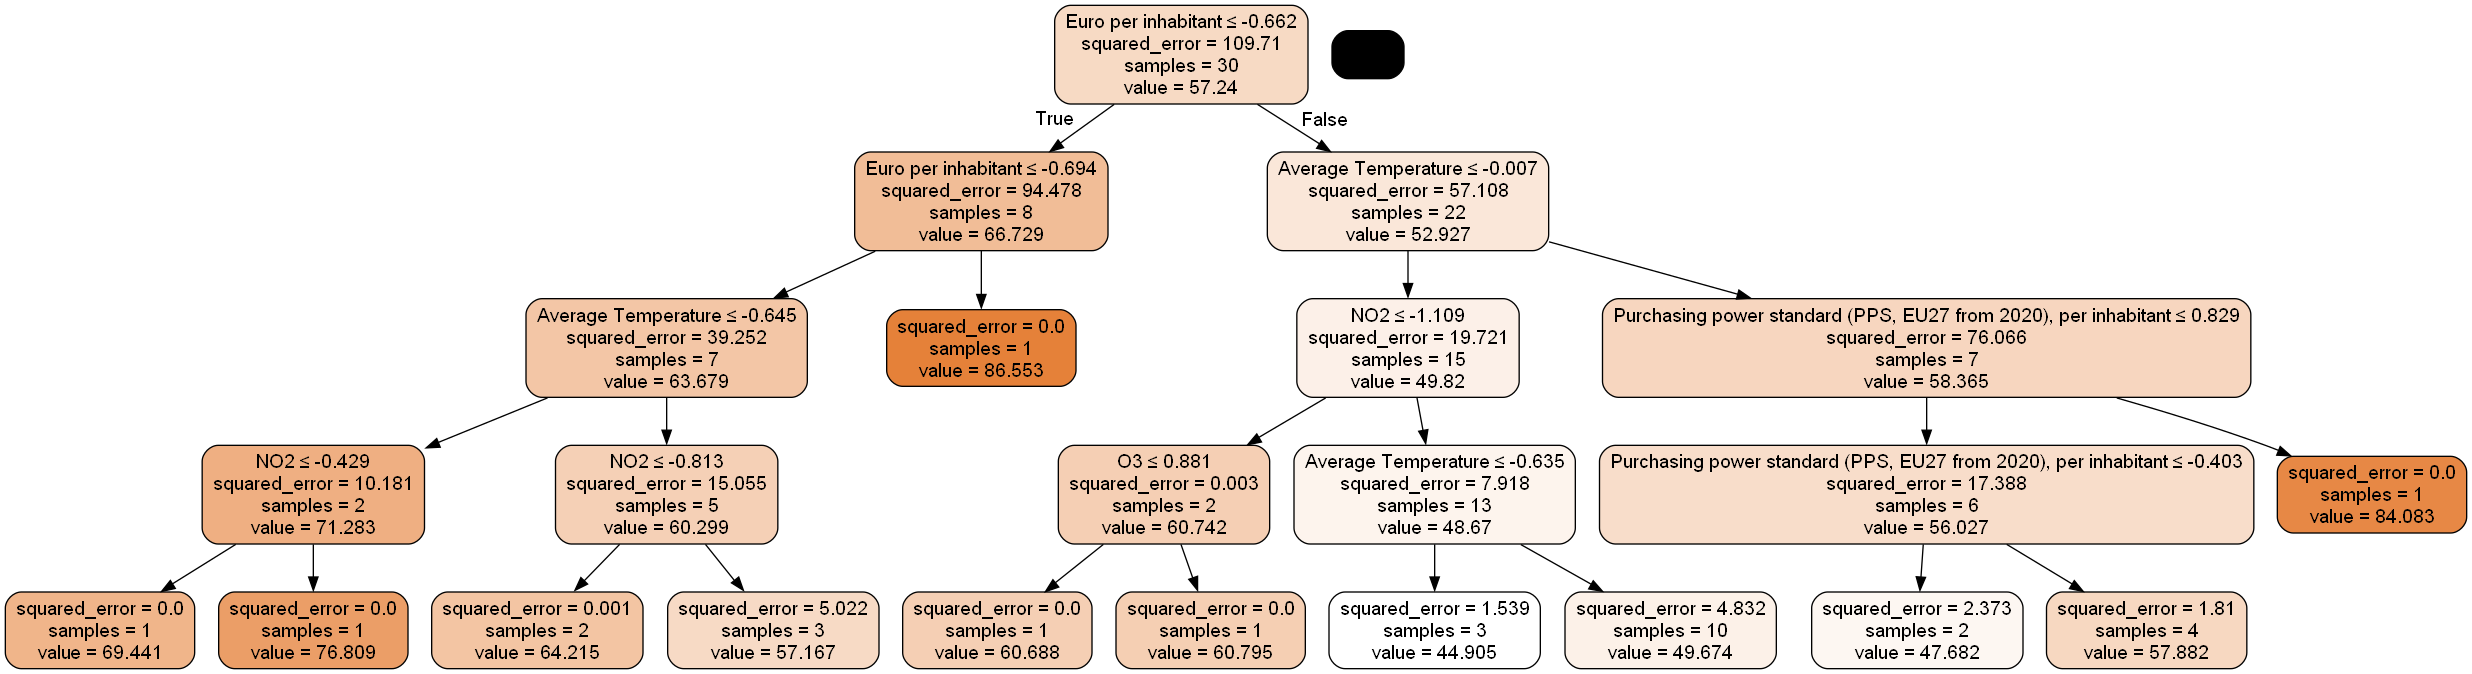

In [721]:
# export the decision tree to a tree.dot file
dot_data = export_graphviz(reg.estimators_[0], out_file=None,
                            feature_names=x_train.columns,
                            filled=True, rounded=True,
                            special_characters=True)

## draw the decision tree using pydotplus
graph = pydotplus.graph_from_dot_data(dot_data)

## show the decision tree
Image(graph.create_png())



In [722]:
# get the feature importances
importances = reg.feature_importances_

# convert the importances into one-dimensional 1darray with corresponding df column names as axis labels
f_importances = pd.Series(importances, x_train.columns)

# sort the array in descending order of the importances
f_importances.sort_values(ascending=False, inplace=True)




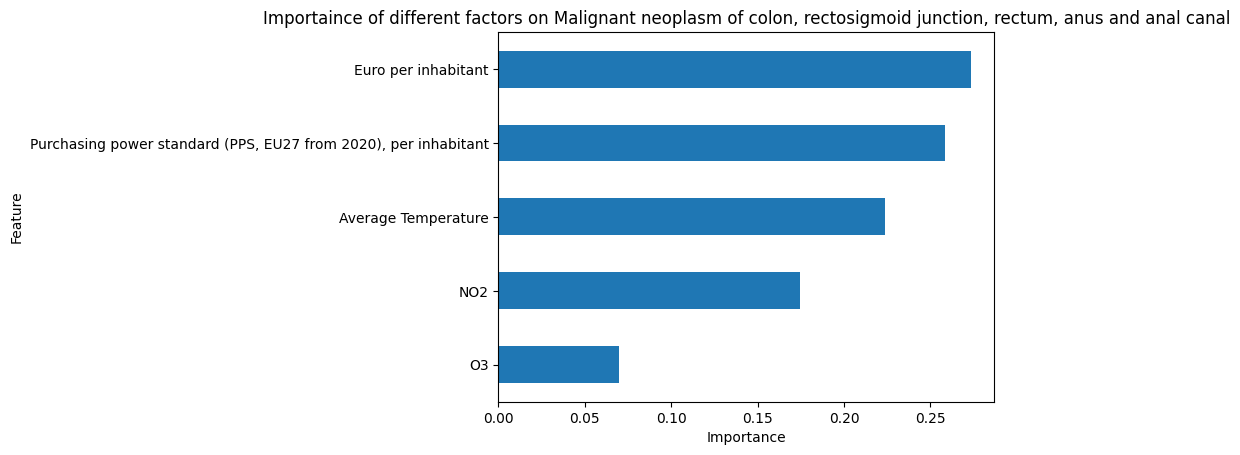

In [723]:
import matplotlib.pyplot as plt

# Create a figure and a set of subplots
fig, ax = plt.subplots()

# Plot the feature importances as a horizontal bar chart
f_importances.plot(kind='barh', ax=ax)

# Invert the y-axis to have the highest importance feature at the top
ax.invert_yaxis()

# Set labels
ax.set_xlabel('Importance')
ax.set_ylabel('Feature')

# Set title
ax.set_title("Importaince of different factors on " + DISEASE)

# Show the plot
plt.show()


<class 'pandas.core.series.Series'>
         NO2        O3  Euro per inhabitant  \
21  0.797523 -0.031398             0.320634   
2   2.194919 -0.498321            -0.226093   
33 -1.245618 -0.968915             0.312649   
3   0.999443 -0.796827             0.052907   
6  -0.012277 -0.671977             0.576150   
43 -1.341542 -0.377409            -1.614988   
19  1.225990 -0.485833             1.506620   
58 -1.136417 -0.616369            -1.347731   
56 -0.683083 -1.392460            -1.007200   
27  0.409974 -0.597144            -0.371230   
24  0.005396 -1.450045            -0.123699   
40  0.641492 -0.024562             2.523797   
17  1.507261 -1.203437            -0.910442   
28 -0.483974  2.212482            -0.331306   
22  0.657346 -0.469438            -0.132154   
51  0.225822  0.641121             2.092708   

    Purchasing power standard (PPS, EU27 from 2020), per inhabitant  \
21                                           0.435459                 
2                     

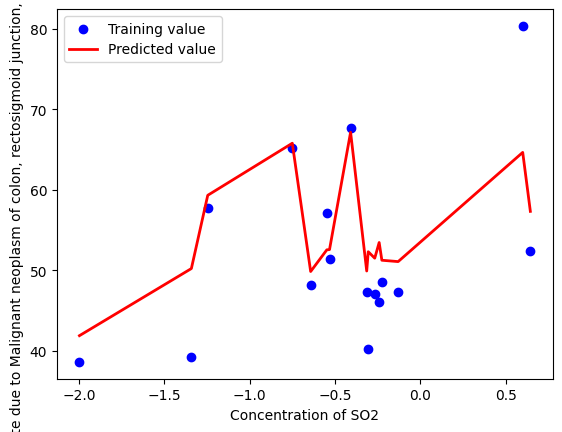

In [725]:
# Plot the graph of predicted and actual values and the reg line where the x axis wil be SO2 and y axis will be the disease
# I want to add interval of confidence
# sort the values of x before line plot
print(type(x_test["Average Temperature"]))

x_test["Average Temperature"], y_test, y_test_pred = zip(*sorted(zip(x_test["Average Temperature"], y_test, y_test_pred)))
print(x_test)

plt.scatter(x_test["Average Temperature"], y_test, c = "blue",  label = "Training value")
plt.plot(x_test["Average Temperature"], y_test_pred, c = "red",  label = "Predicted value", linewidth = 2, linestyle = "-")
plt.xlabel("Concentration of SO2")
plt.ylabel("Standardized death rate due to " + DISEASE)
plt.legend(loc = 2)


plt.show()
